# Task 1 : Data preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [2]:
car=pd.read_csv(r"K:\Desktop\NIIT\Practice\Course9\DS2_C5_S2_Mtcars_Data_Practice.csv")
car

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
car.isnull().sum()

Unnamed: 0    0
mpg           0
cyl           0
disp          0
hp            0
drat          0
wt            0
qsec          0
vs            0
am            0
gear          0
carb          0
dtype: int64

In [4]:
car.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [6]:
def outlier_treatment(dataframe):
    columns=dataframe.select_dtypes(include=["int64","float64"]).columns
    for item in columns:
        percentile25 = dataframe[item].quantile(0.25)
        percentile75 = dataframe[item].quantile(0.75)
        iqr=percentile75-percentile25
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr
        dataframe[item] = np.where(dataframe[item] > upper_limit,upper_limit,
        np.where(dataframe[item] < lower_limit,lower_limit,dataframe[item]))
    return dataframe
car=outlier_treatment(car)

<AxesSubplot: >

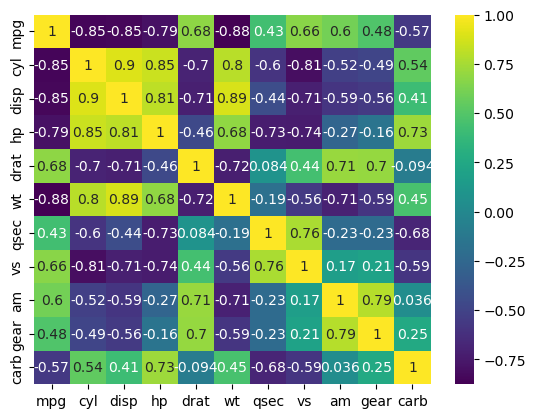

In [7]:
sns.heatmap(car.corr(),cmap='viridis',annot=True)

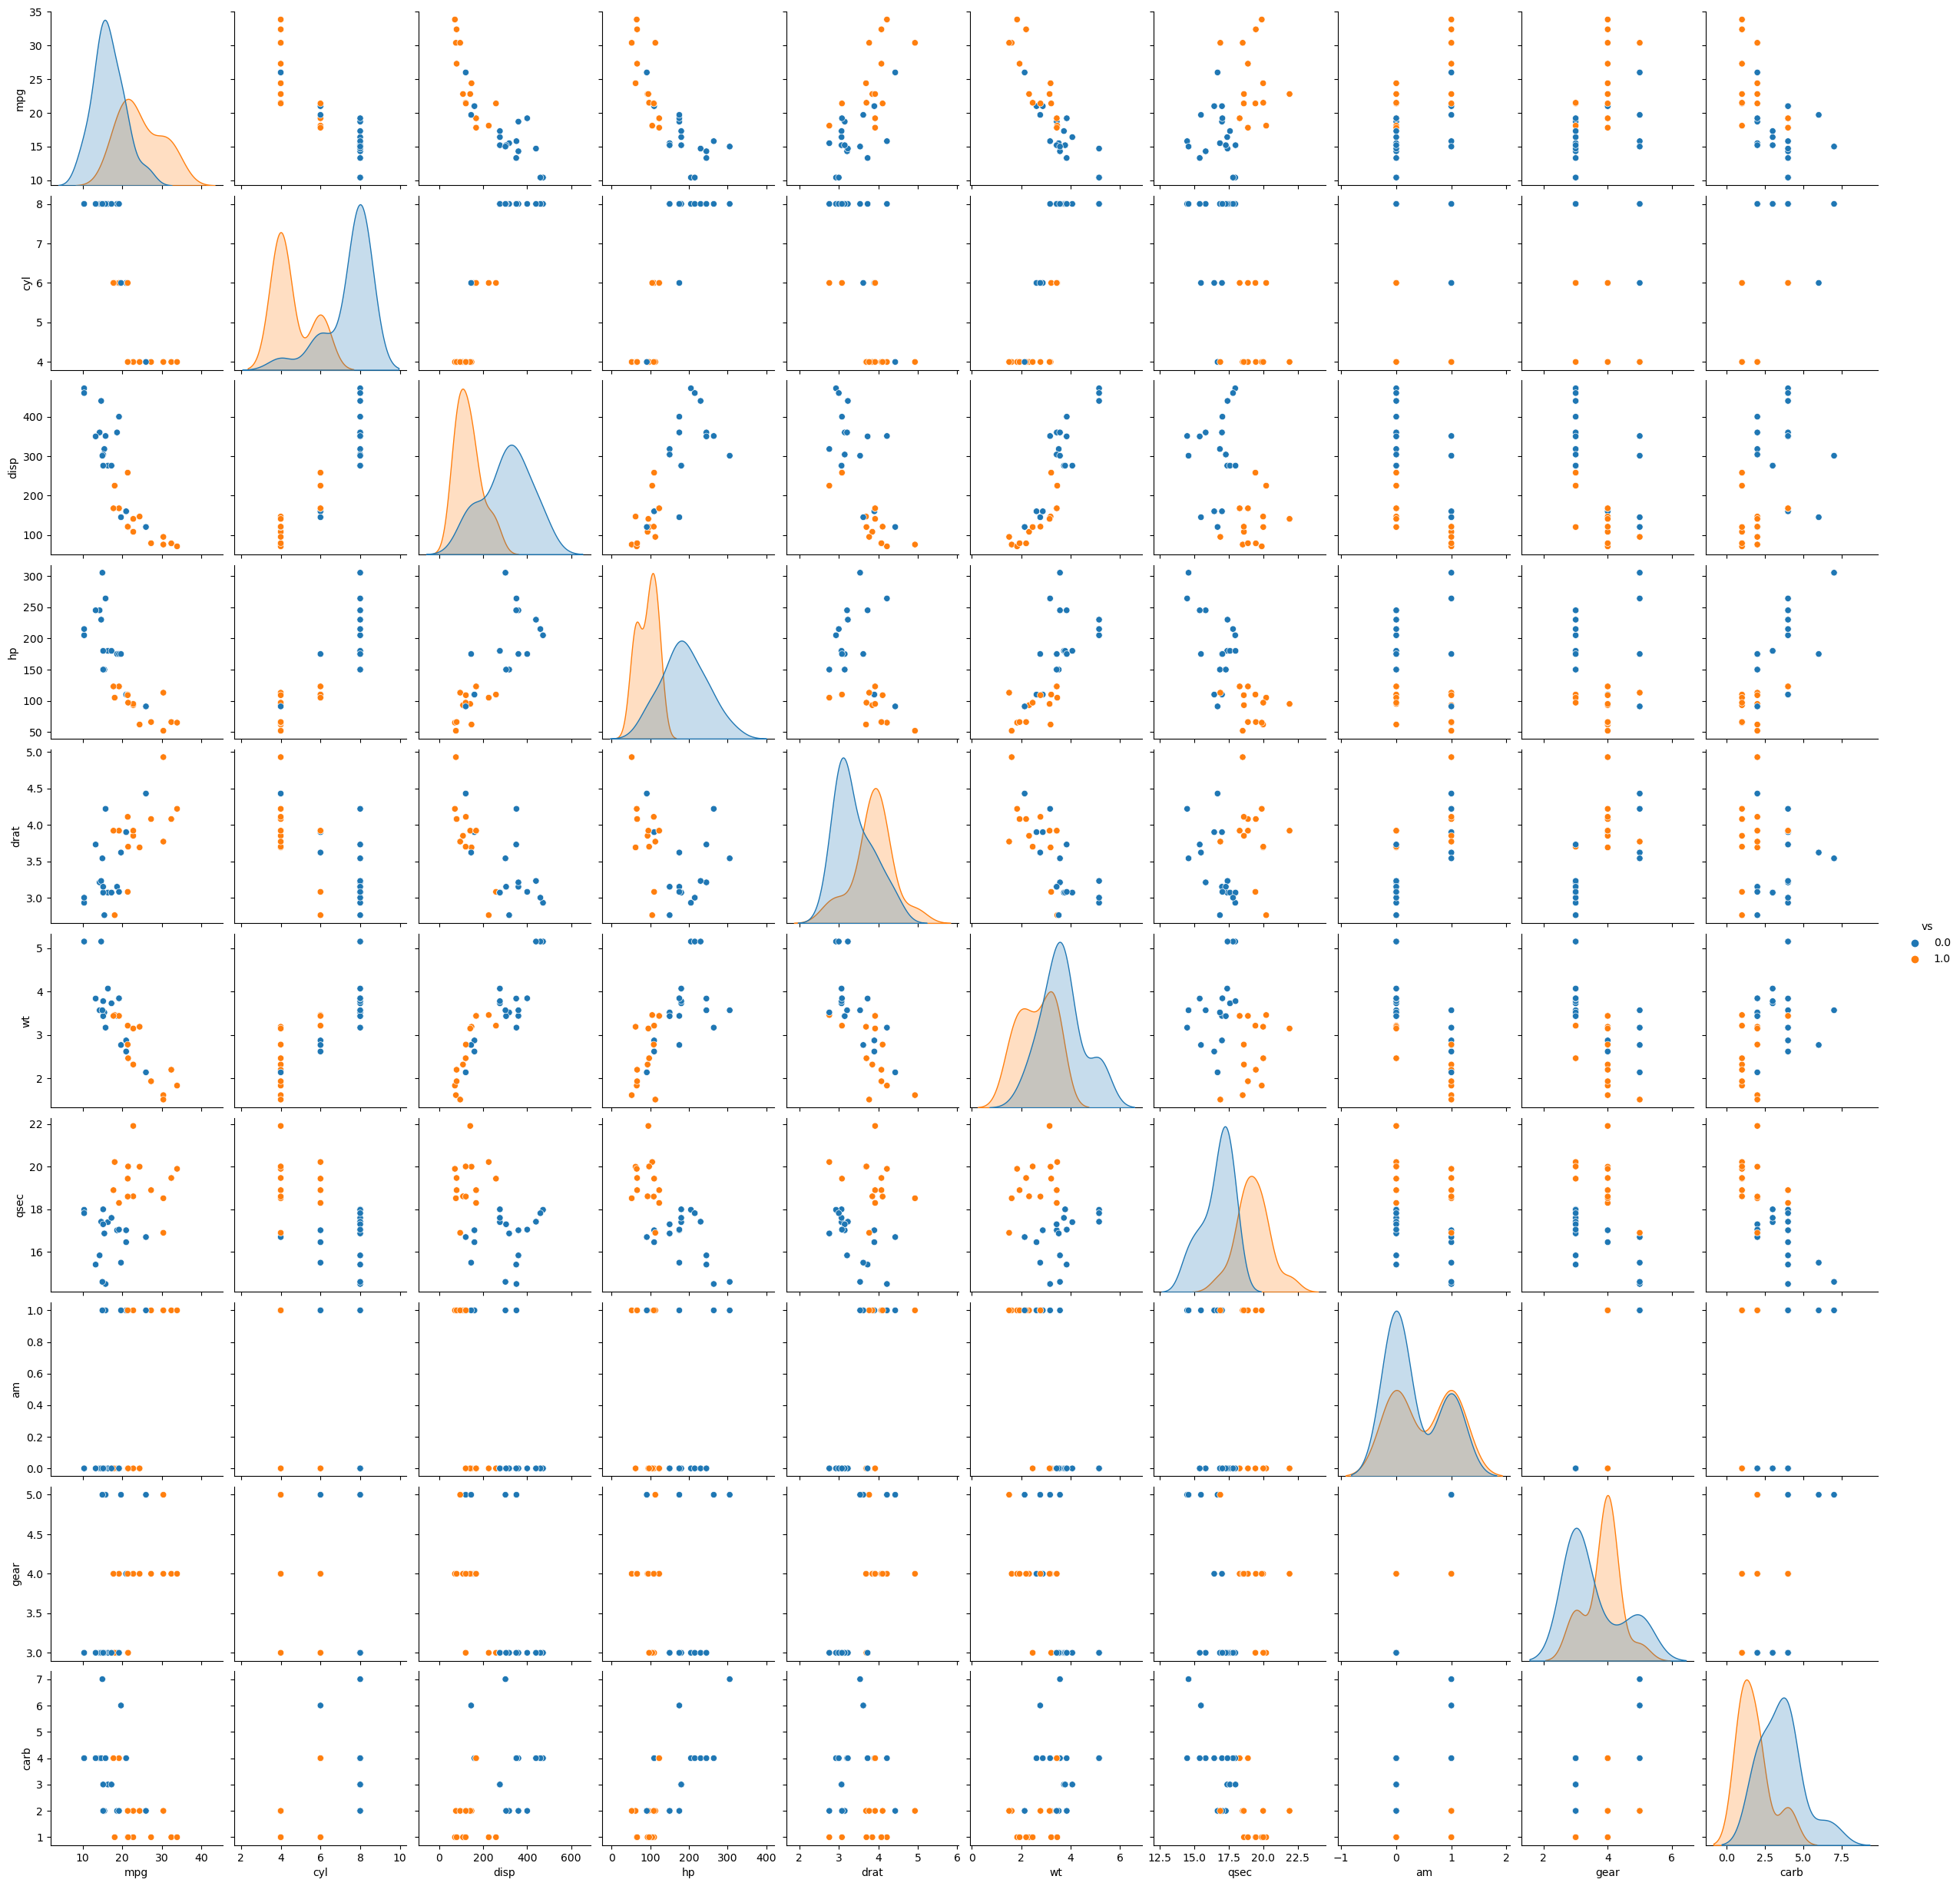

In [8]:
sns.pairplot(car,hue="vs")

## Train test split

In [9]:
def random_state_calc(features_df,Target):
    model=LinearRegression()
    ts_score=[]
    ts_rsme=[]
    for j in range(500):
        X_train,X_test,Y_train,Y_test=train_test_split(features_df,Target,test_size=0.30,random_state=j)
        model.fit(X_train,Y_train)
        ts_score.append(model.score(X_test, Y_test))
        y_pred =model.predict(X_test)
        s=mean_squared_error(Y_test, y_pred, squared=True)
        ts_rsme.append(s)
    J = ts_score.index(np.max(ts_score))
    M= ts_rsme.index(np.min(ts_rsme))
    return M

In [10]:
x=np.array(car.wt).reshape((-1,1))
y=np.array(car.mpg)
m=random_state_calc(x,y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=m)


In [11]:
print("Model running .....")
model=LinearRegression().fit(X_train,y_train)
print()
print("Coefficient of determination ",model.score(X_test,y_test))
print("Intercept = ",model.intercept_)
print('slope:',model.coef_)


Model running .....

Coefficient of determination  0.924333894107622
Intercept =  38.051636272570974
slope: [-5.5787576]


# Predicted values

In [12]:
y_pred =model.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[22.01270818 17.24287044 18.13547166 18.86071014 18.86071014 18.86071014
 20.1159306   9.30360104 29.61097603 16.96393256]


## Evaluation

In [13]:
rsme=mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
sme= mean_squared_error(y_test, y_pred)

In [14]:
print("Root_mean_squared = ",rsme)
print("Mean_absolute_error = ",mae)
print("Mean_squared_error = ",sme)

Root_mean_squared =  1.3678822072638712
Mean_absolute_error =  1.0699444434526155
Mean_squared_error =  1.8711017329490804


K:\Games\PROGRAMS\ANACONDA\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


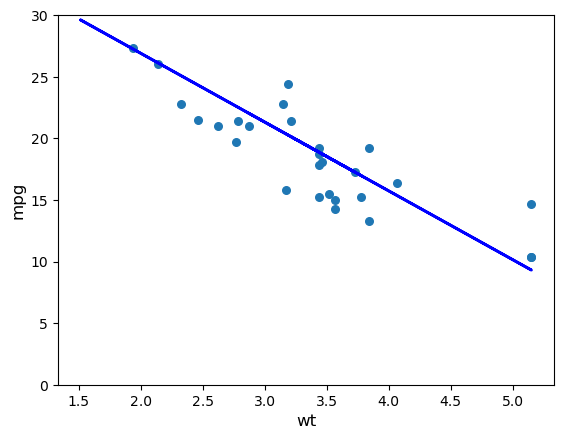

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('xlabel', fontsize=12)
ax.set_ylabel('ylabel', fontsize=12)
plt.ylim((0,30))

car.plot.scatter(x = 'wt', y = 'mpg', s = 30, ax=ax)
plt.plot(X_test, y_pred, color="blue", linewidth=2)
plt.show()

# 1 or more independent Variables

In [30]:
x=np.array(car.loc[:,["wt","disp"]]).reshape((-1,2))
y=np.array(car.mpg)
m=random_state_calc(x,y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=m)


print("Model running .....")
model=LinearRegression().fit(X_train,y_train)
print()
print("Coefficient of determination ",model.score(X_test,y_test))
print("Intercept = ",model.intercept_)
print('coeff:',model.coef_)


print("The Equation of model : Y={0}-{1}x1+{2}x2".format(model.intercept_,model.coef_[0],model.coef_[1]))

rsme=mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
sme= mean_squared_error(y_test, y_pred)

print("Root_mean_squared = ",rsme)
print("Mean_absolute_error = ",mae)
print("Mean_squared_error = ",sme)

Model running .....

Coefficient of determination  0.9264547533855727
Intercept =  35.342911255363035
coeff: [-3.50115361 -0.0168726 ]
The Equation of model : Y=35.342911255363035--3.5011536148811317x1+-0.016872599839633476x2
Root_mean_squared =  8.032215597215586
Mean_absolute_error =  6.580397229200457
Mean_squared_error =  64.51648740015332


# Rebuilding with one more independent feature (3)

In [23]:
x=np.array(car.loc[:,["wt","disp","hp"]]).reshape((-1,3))
y=np.array(car.mpg)
m=random_state_calc(x,y)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=m)


In [24]:
print("Model running .....")
model=LinearRegression().fit(X_train,y_train)
print()
print("Coefficient of determination ",model.score(X_test,y_test))
print("Intercept = ",model.intercept_)
print('coeff:',model.coef_)


Model running .....

Coefficient of determination  0.9640558866952016
Intercept =  38.61245893943965
coeff: [-4.52192888  0.005911   -0.03754289]


In [25]:
print("Y=38.61-4.5x1+0.0059x2-0.037x3")

Y=38.61-4.5x1+0.0059x2-0.037x3


In [26]:
rsme=mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)
sme= mean_squared_error(y_test, y_pred)

print("Root_mean_squared = ",rsme)
print("Mean_absolute_error = ",mae)
print("Mean_squared_error = ",sme)

Root_mean_squared =  7.887000689646121
Mean_absolute_error =  6.317927225435071
Mean_squared_error =  62.20477987847839
